In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
def load_image_grayscale(path):
    img = Image.open(path).convert('L')  # Convert to grayscale
    img_np = np.array(img).astype(np.float32) / 255.0  # Normalize to [0, 1]
    return img_np

In [ ]:


def load_image_grayscale(path):
    img = Image.open(path).convert('L')  # Convert to grayscale
    img_np = np.array(img).astype(np.float32) / 255.0  # Normalize to [0, 1]
    return img_np



In [32]:

# Set the folder path and extension
folder_path = r"C:\Users\beery\OneDrive\桌面\Study\SoSe 2025 Jena\Imip\Captured photos\01.07.25"
file_extension = '.jpg'  # or '.jpg', etc.

# Load images in the specified order
image_list = []

for x in range(8):
    for y in range(8):
        filename = f'led_r{x}_c{y}{file_extension}'
        filepath = os.path.join(folder_path, filename)
        img = load_image_grayscale(filepath)
        image_list.append(img)


In [10]:
def display_low_res_images(images, grid_size):
    rows, cols = grid_size
    fig, axs = plt.subplots(rows, cols, figsize=(3 * cols, 3 * rows))
    for i in range(rows):
        for j in range(cols):
            idx = (rows - 1 - i) * cols + j  # Flip vertically
            axs[i, j].imshow(images[idx], cmap='gray')
            axs[i, j].axis('off')
            axs[i, j].set_title(f'Patch ({rows - 1 - i},{j})')  # Match LED row index
    plt.tight_layout()
    plt.show()

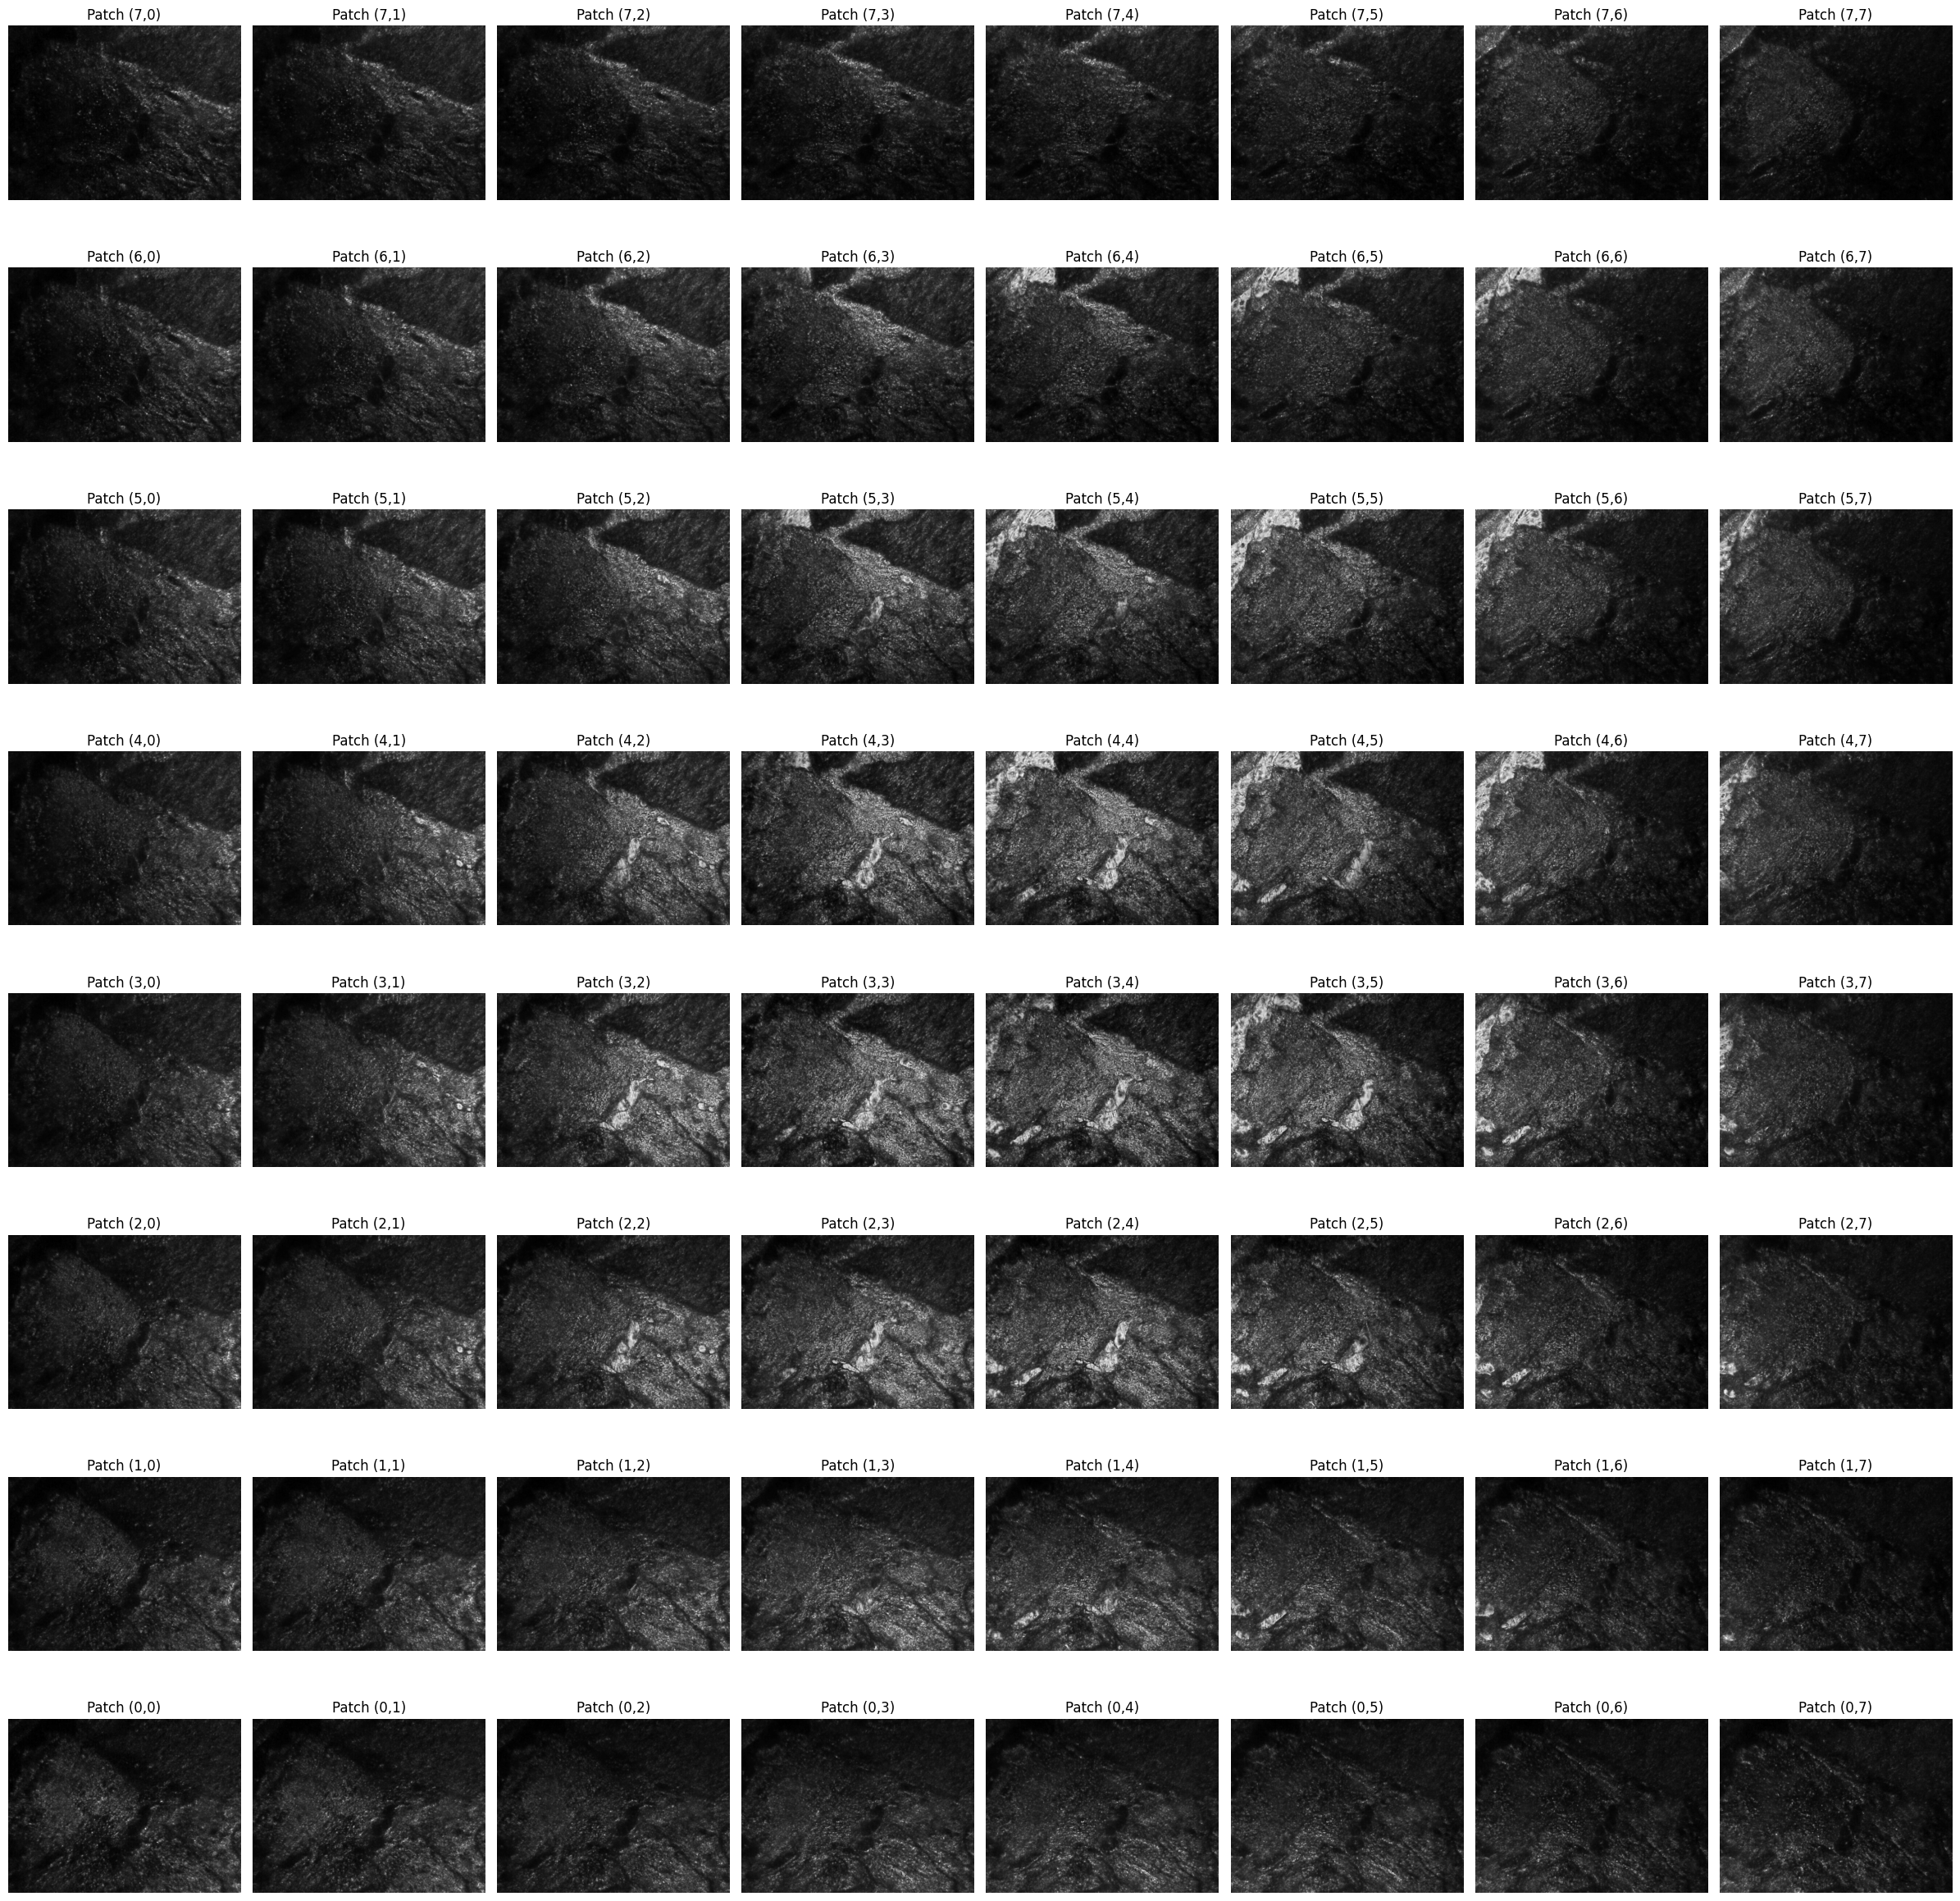

In [11]:
grid_size = (8, 8)  # 8x8 grid
# Display reconstructed images
display_low_res_images(image_list, grid_size)

In [12]:
image_list[1].shape

(480, 640)

In [25]:
#system constants
# These constants are based on the provided information
Led_spacing=0.8125  # Spacing between LEDs in cm
Dist_led_t_sample=14.75 # Distance from LED to sample in cm
wavelength = 514 # Wavelength in nm
#calculate the shift in frequency space by NA/lambda
NA_LED= 0.8125/np.sqrt(Led_spacing**2+ Dist_led_t_sample**2)
NA_camera=0.15
Shift_proportion=NA_LED/NA_camera
dy=image_list[0].shape[0] * Shift_proportion  # Shift in y direction
dx=image_list[0].shape[1] * Shift_proportion  # Shift in x direction

In [26]:
# Create a grid of coordinates based on the LED positions
# The grid will be centered around (0, 0) with the specified spacing

# Generate coordinates centered around 0
y = np.arange(-3.5, 4.5) * dy  # 8 values (top to bottom)
x = np.arange(3.5, -4.5, -1) * dx  # 8 values (right to left)

# Create meshgrid
xx, yy = np.meshgrid(x, y)

# Stack and reshape into (1, 64, 2)
grid_points = np.stack([yy.ravel(), xx.ravel()], axis=1)  # (64, 2)
grid_3d = grid_points[None, :, :]  # (1, 64, 2)

print(grid_3d.shape)  # (1, 64, 2)


(1, 64, 2)


In [27]:
#scale grid_3d by a small factor
scale_factor = 1
grid_3d *= scale_factor
grid_3d

array([[[-616.01526388,  821.35368517],
        [-616.01526388,  586.6812037 ],
        [-616.01526388,  352.00872222],
        [-616.01526388,  117.33624074],
        [-616.01526388, -117.33624074],
        [-616.01526388, -352.00872222],
        [-616.01526388, -586.6812037 ],
        [-616.01526388, -821.35368517],
        [-440.01090277,  821.35368517],
        [-440.01090277,  586.6812037 ],
        [-440.01090277,  352.00872222],
        [-440.01090277,  117.33624074],
        [-440.01090277, -117.33624074],
        [-440.01090277, -352.00872222],
        [-440.01090277, -586.6812037 ],
        [-440.01090277, -821.35368517],
        [-264.00654166,  821.35368517],
        [-264.00654166,  586.6812037 ],
        [-264.00654166,  352.00872222],
        [-264.00654166,  117.33624074],
        [-264.00654166, -117.33624074],
        [-264.00654166, -352.00872222],
        [-264.00654166, -586.6812037 ],
        [-264.00654166, -821.35368517],
        [ -88.00218055,  821.35368517],


Text(0.5, 1.0, 'Image at index 36')

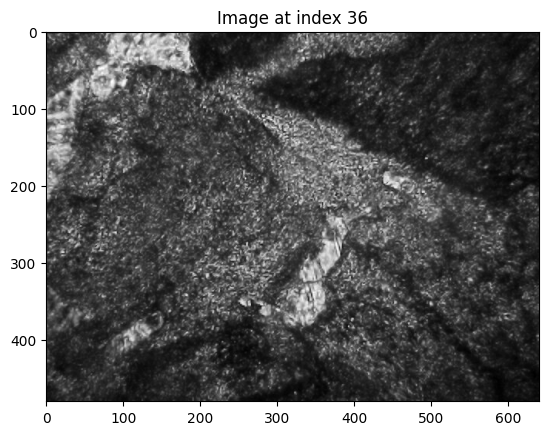

In [28]:
#cisualize a chosen image
index= 36  # Change this to visualize a different image
chosen_image = image_list[index]
plt.imshow(chosen_image, cmap='gray')
plt.title(f'Image at index {index}')

In [29]:
stacked_images = np.stack(image_list, axis=-1)
stacked_images.shape

(480, 640, 64)

In [30]:
%load_ext autoreload
%autoreload 2
import Main_functions
from Main_functions import AlterMin

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


| iter |  rmse    |
--------------------
|  0   | inf |
|  1   | 8.95e+05 |
|  2   | 3.87e+04 |
|  3   | 3.67e+04 |
|  4   | 3.46e+04 |
|  5   | 3.29e+04 |
|  6   | 3.13e+04 |
|  7   | 3.00e+04 |
|  8   | 2.88e+04 |
|  9   | 2.78e+04 |
| 10   | 2.69e+04 |
| 11   | 2.61e+04 |
| 12   | 2.54e+04 |
| 13   | 2.47e+04 |
| 14   | 2.42e+04 |
| 15   | 2.37e+04 |
| 16   | 2.32e+04 |
| 17   | 2.28e+04 |
| 18   | 2.25e+04 |
| 19   | 2.22e+04 |
| 20   | 2.20e+04 |
| 21   | 2.18e+04 |
| 22   | 2.17e+04 |
| 23   | 2.16e+04 |
| 24   | 2.16e+04 |
| 25   | 2.16e+04 |


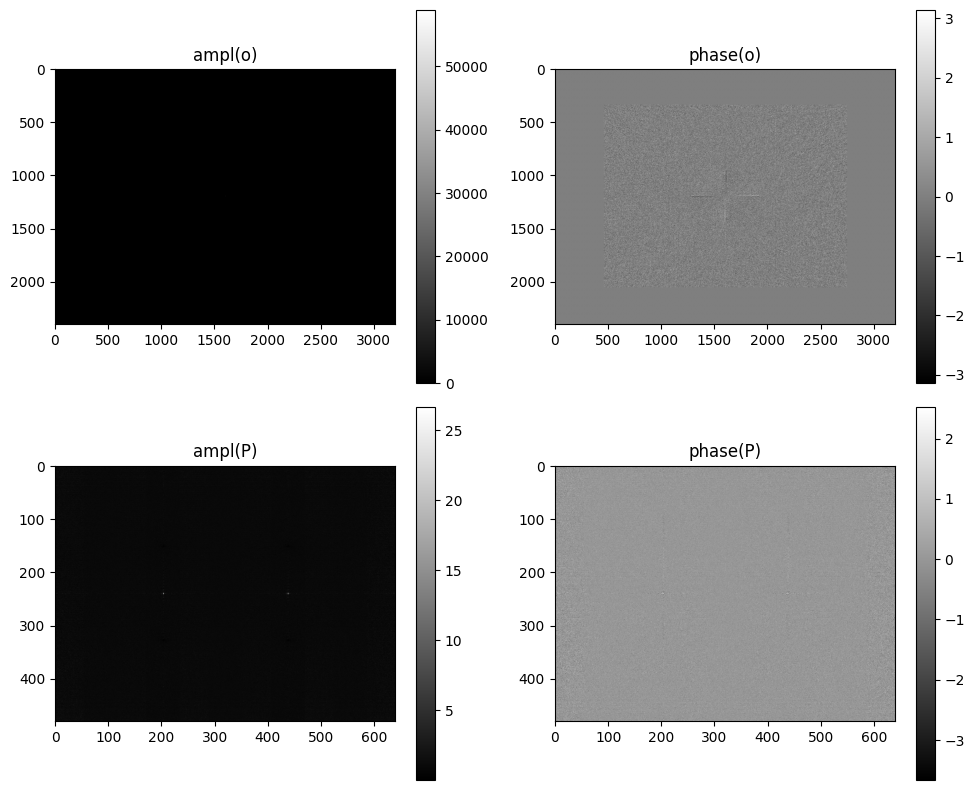

elapsed time: 286 seconds


In [31]:
# Stepsize 0.001
# Alpha Beta are both 7
dim=[2400, 3200]
O, P, err, scale, Ns = AlterMin(stacked_images, dim, grid_3d, {})


Text(0.5, 1.0, 'Optimized Image')

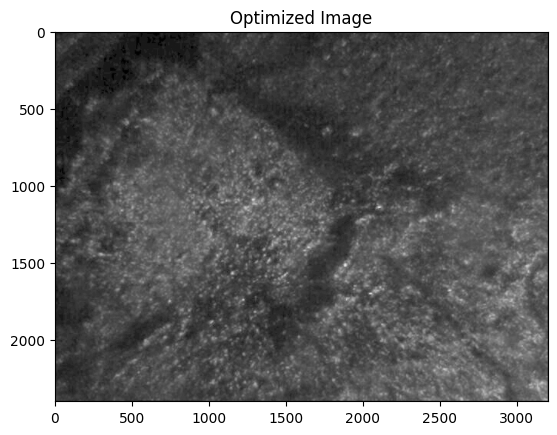

In [20]:
o_image=np.fft.ifft2(O)
plt.imshow(np.abs(o_image), cmap='gray')
# Display the optimized image
plt.title("Optimized Image")

In [21]:
o_image.shape

(2400, 3200)